In [1]:
#한글 태깅을 위한 패키지 설치
import os
import numpy as np
import pandas as pd
from konlpy.tag import Okt

In [2]:
#네이버 리뷰 읽어오기
senti = pd.read_csv('material/nsmc/ratings.txt', sep='\t')

In [3]:
train_df = pd.read_csv('material/nsmc/ratings_train.txt', sep='\t')
test_df = pd.read_csv('material/nsmc/ratings_test.txt', sep='\t')

In [4]:
train_df.shape, test_df.shape

((150000, 3), (50000, 3))

In [5]:
tagger = Okt()

In [6]:
# 형태소  태깅에 장시간이 소요됨으로 한번 시행 후 저장하여 활용
#neg=pos여야 하나 코드 이해 오류로 잘못된 변수에 저장을 했고, 변경이 불가능함.
#train_df['pos'] = train_df['document'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
#test_df['pos'] = test_df['document'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
#train_df.to_csv('material/nsmc/ratings.txt', index=False)
#test_df.to_csv('material/nsmc/ratings .txt', index=False)

In [7]:
train_df = pd.read_csv('material/nsmc/train.csv')
test_df = pd.read_csv('material/nsmc/test.csv')

In [8]:
#'neg' 열을 'pos'열로 바꾸기 위한 작업
train_df['pos']=train_df['neg']
train_df.drop(['neg'], axis='columns', inplace=True)

In [9]:
train_df.head()

id                                           document  label  \
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   
2  10265843                                  너무재밓었다그래서보는것을추천한다      0   
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   

                                                 pos  
0  [('아', 'Exclamation'), ('더빙', 'Noun'), ('..', ...  
1  [('흠', 'Noun'), ('...', 'Punctuation'), ('포스터'...  
2  [('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'No...  
3  [('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Nou...  
4  [('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'De...

In [10]:
#'neg' 열을 'pos'열로 바꾸기 위한 작업
test_df['pos']=test_df['neg']
test_df.drop(['neg'], axis='columns', inplace=True)

In [11]:
test_df.head()

id                                           document  label  \
0  6270596                                                굳 ㅋ      1   
1  9274899                               GDNTOPCLASSINTHECLUB      0   
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0   
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0   
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0   

                                                 pos  
0     [('굳다', 'Adjective'), ('ㅋ', 'KoreanParticle')]  
1                [('GDNTOPCLASSINTHECLUB', 'Alpha')]  
2  [('뭐', 'Noun'), ('야', 'Josa'), ('이', 'Noun'), ...  
3  [('지루하다', 'Adjective'), ('않다', 'Verb'), ('완전',...  
4  [('3', 'Number'), ('D', 'Alpha'), ('만', 'Noun'...

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화

In [14]:
vectorizer = TfidfVectorizer(max_features=5000) # colab RAM이 부족하여 5천개로 타협
vectorizer.fit(train_df['pos'])
train_X = vectorizer.transform(train_df['pos'])
test_X = vectorizer.transform(test_df['pos'])

In [15]:
len(vectorizer.get_feature_names())

5000

In [16]:
train_y = train_df['label']
test_y = test_df['label']

In [17]:
#모델링에 필요한 module import 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(train_X, train_y, epochs=10, batch_size=512)
results = model.evaluate(test_X, test_y) # 83%의 정확도 확보

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
150000/150000 [==============================] - 3s 21us/sample - loss: 0.4194 - binary_accuracy: 0.81410s - loss: 0.4319 - binary_accu
Epoch 2/10
150000/150000 [==============================] - 6s 37us/sample - loss: 0.3620 - binary_accuracy: 0.8376
Epoch 3/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3524 - binary_accuracy: 0.8427
Epoch 4/10
150000/150000 [==============================] - 6s 37us/sample - loss: 0.3429 - binary_accuracy: 0.8467
Epoch 5/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3354 - binary_accuracy: 0.8513
Epoch 6/10
150000/150000 [==============================] - 6s 37us/sample - loss: 0.3294 - binary_accuracy: 0.8546
Epoch 7/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3238 - binary_accuracy: 0.8586
Epoch 8/10
150000/150000 [===========

In [19]:
##대본 감성분석
#대본 불러오기
script = pd.read_csv('대본/부산행-지문분리.csv')

In [20]:
script['pos'] = script['content'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
script.to_csv('material/nsmc/script.csv', index=False)

In [21]:
script.head()

act                                            content  \
0    1                                    진양 톨게이트, 차안 - 낮   
1  NaN                                                NaN   
2   지문  공허한 시선의 마네킹 얼굴. 작업복 차림에 반짝이는 경광봉을 기계적으로 흔드는 9등...   
3   지문  방역 살포 장치 앞에서는 공익요원이 차량들을 방역하고 있다. 톨게이트 앞에 멈춰서는...   
4  NaN                                                NaN   

                                                 pos  
0  [(진양, Noun), (톨게이트, Noun), (,, Punctuation), (...  
1                                     [(nan, Alpha)]  
2  [(공허하다, Adjective), (시선, Noun), (의, Josa), (마네...  
3  [(방역, Noun), (살포, Noun), (장치, Noun), (앞, Noun)...  
4                                     [(nan, Alpha)]

In [22]:
script = pd.read_csv('material/nsmc/script.csv')

In [23]:
tagger = Okt()

In [24]:
script_X = vectorizer.transform(script['pos'])

In [25]:
script_y = model.predict(script_X)

In [26]:
script['label'] = script_y

In [27]:
script.sort_values(by=['label'])

act                                            content  \
296     인길               (안쓰러운 듯) 어휴어휴… 저걸 어째…다치겠네…저러믄 안되지…….   
185     영국                            (짜증) 야, 이씨… 그냥 딴 데 앉아라.   
775     58                                KTX 12-13호 연결부 - 아침   
968     71                                KTX 12-13호 연결부 - 아침   
824     62                                KTX 12-13호 연결부 - 아침   
...    ...                                                ...   
507     인길                                      (수안을 돌아보며) 어?   
1505    지문  터널에 울리는 수안의 노랫소리. 배를 움켜쥐고 식은땀을 흘리는 성경의 손을 잡고 터...   
380     성경                                       (휙 돌아보는) ……!   
130     지문  조용히 방문을 닫고 나가는 석우모. 석우모의 뒷모습을 보던 석우, 캠코더를 내려본다...   
49    김 대리                                       (다시 돌아보며) 네?   

                                                    pos     label  
296   [('(', 'Punctuation'), ('안쓰럽다', 'Adjective'), ...  0.001727  
185   [('(', 'Punctuation'), ('짜증', 'Noun'), (')', '...  0.004520  
775   [('KTX', 'Alpha'), ('12-13', 'Number'), ('호', ...  0.012304  
968   [('KTX', 'Alpha'), ('12-13', 'Number'), ('호', ...  0.012304  
824   [('KTX', 'Alpha'), ('12-13', 'Number'), ('호', ...  0.012304  
...                                                 ...       ...  
507   [('(', 'Punctuation'), ('수안', 'Noun'), ('을', '...  0.981879  
1505  [('터널', 'Noun'), ('에', 'Josa'), ('울리다', 'Verb'...  0.984130  
380   [('(', 'Punctuation'), ('휙', 'Noun'), ('돌아보다',...  0.985727  
130   [('조용하다', 'Adjective'), ('방문', 'Noun'), ('을', ...  0.986208  
49    [('(', 'Punctuation'), ('다시', 'Noun'), ('돌아보다'...  0.992155  

[1527 rows x 4 columns]

In [87]:
##대사 연관분석
main_actor = ['석우','상화','수안','용석','기장','성경']

In [88]:
script_by_actor = pd.DataFrame(index = main_actor)

In [90]:
for actor in main_actor: # 인물별로 대사들의 품사 테깅 데이터를 통합
    script_by_actor.loc[actor, 'scripts'] = script[script['act'] == actor]['pos'].str.cat()

In [91]:
script_by_actor

scripts
석우  [('…', 'Punctuation'), ('상무', 'Noun'), ('님', '...
상화  [('(', 'Punctuation'), ('깔다', 'Verb'), ('아보', ...
수안  [('(', 'Punctuation'), ('소리', 'Noun'), (')', '...
용석  [('(', 'Punctuation'), ('2-3', 'Number'), ('호'...
기장  [('(', 'Punctuation'), ('소리', 'Noun'), (')', '...
성경  [('야', 'Exclamation'), (',', 'Punctuation'), (...

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
corvec = TfidfVectorizer()
script_vec = corvec.fit_transform(script_by_actor['scripts'])

In [94]:
import scipy # 벡터거리 계산 함수 https://steemit.com/kr/@anpigon/5
def dist_norm(v1, v2):
    v1_normalized = v1/scipy.sparse.linalg.norm(v1)
    v2_normalized = v2/scipy.sparse.linalg.norm(v2)
    delta = v1_normalized - v2_normalized
    return scipy.sparse.linalg.norm(delta)

In [95]:
cor_mat = np.zeros([6,6]) # 계산된 값을 상관 행렬로 정리
for i in range(6):
    for j in range(6):
        cor_mat[i,j] = dist_norm(script_vec[i], script_vec[j])

In [97]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 742 kB/s eta 0:00:01


<AxesSubplot:>

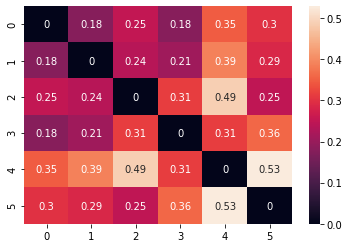

In [98]:
import seaborn as sns
sns.heatmap(cor_mat, annot=True) #석우','상화','수안','용석','기장','성경'

In [105]:
script[(script['act']=="상화") | (script['act']=="석우")].tail(50)
#대사가 유사함을 확인할 수 있음.

act                                            content  \
923   석우                     (핸드폰 화면만 보며) …유치하게… 대한민국이 뭡니까?   
924   상화                                                 뭐?   
928   상화                                               뭐라고?   
929   석우  (상화 보며) 2분. 2분정도 벌 수 있는 터널이 있어요. (영국 보며) 건너갈 수...   
933   상화                             (피식) 너, 항상 따는 쪽이라고 했나?   
934   석우                                                …….   
935   상화                                       아이고…힘들었겠네…….   
936   석우                                           (보는) …….   
937   상화  야 좀만 참아라…니 딸도 좀 만 더 크면 니가 왜 기를 쓰고 사는지 알 때가 있지 ...   
997   상화                            (문을 붙잡고 서서) 뭐해? 왜 안 열어?   
1014  상화                               (영국을 향해) 빨리 좀 열어 봐!!   
1016  상화                              (문을 잡고 버티며) 그럼 부숴버려!!   
1020  석우                     (뻗어 나오는 손들을 내리찍으며, 영국에게) 빨리!!!   
1040  상화                                      (버럭) 오지마!!!!!   
1044  상화                            (석우에게) 가, 가 이 섀끼야 너두…….   
1045  석우                                    (발이 안 떨어지는) …….   
1046  상화  (눈물 차오르며 웃는) 이 씨발… 쟨 나 없음 못 사는데… (눈물 흐르며) 아이 씨...   
1050  석우                           (눈시울 붉어지며, 상화에게) …미안해…….   
1054  석우                                   …가야 돼요. …가야 돼…….   
1058  상화                                            윤서연!!!!   
1060  상화                              윤서연이야!!! … 우리 딸 이름…….   
1066  석우           왜 그랬어?! 왜?!! … (일그러지며) 전부 올 수 있었는데… 왜…….   
1068  석우                                                …뭐?   
1076  석우                                (분노에 일그러지며) …당신들…….   
1143  석우                        (힘없이 피식) …오늘 우리 수안이 생일인데…….   
1145  석우                       … 걱정하지 마, 아빠가 꼭 엄마한테 데려다 줄게.   
1147  석우                           (올려 보며) …… 무서워, 아빠도 무서워.   
1149  석우                                                …….   
1151  석우                                                …….   
1158  석우                               (핸드폰에) 김 대리?!… 괜찮아?    
1160  석우                            아직…김 대리 너는 어디야? 거긴 괜찮아?   
1162  석우                    (놀라면서…) 응? 확실해? 어디서 들은 정보야? 응?    
1164  석우                                        (창백해지며) …….   
1166  석우                                       김 대리…지금 어디야.   
1168  석우                   (착잡한 표정의 석우) 김 대리…김 대리 잘못 아니야…….   
1170  석우                                     …김 대리? (전화 끊긴)   
1224  석우  (멀리 플랫폼 쪽에 감염자들을 살피며) 부산은 안전할 거라는 얘길 들었어요. 가려면...   
1309  석우                             (구멍 너머를 향해) 나와요!! 빨리!!   
1345  석우                           (구멍으로 얼굴 보이며) 수안아! 빨리!!!   
1353  석우                                    수안아, 뭐해!! 서둘러!!   
1365  석우                  (수안을 끌어안으며) 가야 돼, 수안아. 그냥 가야 돼…….   
1378  석우                                       (가만히 살피는) ……   
1384  석우                                       당신… 이미 감염됐어.   
1390  석우                                    아니… 당신은 가면 안 돼.   
1399  석우                                               으아악!   
1404  석우                                                안돼!   
1412  석우                             (운전석을 가리키며) 이쪽으로 앉으세요.   
1416  석우  (운전석을 두리번거리며) 저…저도 잘 모르겠는데… (성경의 손에 엔진레버를 쥐어 주...   
1418  석우                                        (다짐받듯) 그래요.   
1423  석우    차…수안아….일단…아줌마 옆에…계속 있어야 되고….부…부산에…가면….엄마가…분명…….   

                                                    pos     label  
923   [('(', 'Punctuation'), ('핸드폰', 'Noun'), ('화면',...  0.089403  
924               [('뭐', 'Noun'), ('?', 'Punctuation')]  0.488419  
928             [('뭐라다', 'Verb'), ('?', 'Punctuation')]  0.295060  
929   [('(', 'Punctuation'), ('상화', 'Noun'), ('보다', ...  0.741101  
933   [('(', 'Punctuation'), ('피식', 'Adverb'), (')',...  0.217792  
934                            [('…….', 'Punctuation')]  0.393801  
935   [('아이고', 'Exclamation'), ('…', 'Punctuation'),...  0.053424  
936   [('(', 'Punctuation'), ('보다', 'Verb'), (')', '...  0.537168  
937   [('야', 'Exclamation'), ('좀', 'Noun'), ('만', 'J...  0.223537  
997   [('(', 'Punctuation'), ('문', 'Noun'), ('을', 'J...  0.320220  
1014  [('(', 'Punctuation'), ('영국', 'Noun')

In [106]:
##토픽 추출
from gensim.summarization.summarizer import summarize

In [107]:
text = script['content'].str.cat(sep=' ')

In [110]:
print(summarize(text, word_count=100))

그 모습을 보며 슬금슬금 5호차 쪽으로 이동하는 수안, 5호차로 들어가는 문손잡이를 당기면… KTX 11-12호 연결부 - 아침 문이 칙 열리며 들어오는 승무원 민지, 깜짝 놀라서 바닥을 본다.
KTX 6-7호 연결부 / 7호차 - 아침 화장실을 나오는 수안 앞으로 빠르게 지나가는 사람들.
수안의 시선으로 사람들을 헤치고 거슬러 올라가는 석우의 뒷모습이 보인다.
동대구역, KTX 15-16호 연결부 - 아침 당황한 얼굴로 화장실 문을 열고 나오는 석우.
… 동대구역, KTX 15호차 / 14-15호 연결부, 화장실 - 아침 방송으로 나오는 기장의 목소리.
수안을 끌어안고 일어서는 석우, 멀리 달려오고 있는 감염자들, 그리고 움직이고 있는 무궁화호 기관차가 보인다.


In [113]:
for actor in main_actor:
    print("------------------")
    print("{}의 대사 요약\n".format(actor))
    text_actor = script[script['act'] == actor]['content'].str.cat(sep=' ')
    print(summarize(text_actor, word_count=30))

------------------
석우의 대사 요약

(허리를 숙여 수안을 보며) 수안아, 괜찮아?
(눈을 맞추고 수안을 바라보며) 수안아 걱정하지 마, 이따가 아빠가 다시 걸어볼게.
(수안에게) 수안아 잠깐 여기 있어.
(감염자들을 가만히 보다가 상화에게 손 내밀며) 핸드폰 좀 줘 봐요.
------------------
상화의 대사 요약

(석우를 발견하고는) 빨리 와!!!
어디 화장실?!
어디 화장실?!
세 칸만 가면돼… (양손에 유리망치 묶으며) 내가 선두, (영국에게) 가운데 너, (석우에게) 그 뒤에 너.
(석우에게) 근데 너, 펀드 매니저라며?
------------------
수안의 대사 요약

(멍하니 박스를 받으며) …….
…아빠 시간 안 뺏을게요.
…아빠?
(종길과 인길을 보며) 하나씩 앉으세요.
(소리, 울며) 아저씨!
(소리, 울며) 아저씨!
(울먹이며) 아저씨…….
(울며) 아빠… 아저씨… 아빠… 저기 아저씨…….
------------------
용석의 대사 요약

천안역에 무조건 열차 세워요!
어? 이봐요, 내가 백두산 고속버스 상무로 있는 사람인데… 지금 대전으로 들어가는 도로가 다 막혔대요.
이런 씨… 무조건 전속력으로 가, 늦으면 부산도 못 들어가는 거야, 알았어?!
------------------
기장의 대사 요약

승객 여러분은 안전을 위해 모두 자리에 앉아 주시길 바랍니다.
(수화기에) 관제실, 101열차 대전역 돌발사태로 정차하지 못했습니다.
(잠깐 생각하더니) 관제실, 101열차 부산까지 직행 가능한지 확인바랍니다, 이상.
(수화기에) 승객 여러분께 알려드립니다.
------------------
성경의 대사 요약

야, 윤상화, 자꾸 시끄럽게…….
별명이고… (상화를 팔꿈치로 쿡 찌르며) 이름은 아빠가 게을러터져서 아직 지어주지 않았어.
(배 내밀며) 자, 인사해.
(수안에게 손을 내밀며) 가자.
(나지막히 배를 어루만지며) 서연아… 니 이름은 서연이야…….
